# Job Demand and Job Pay of each SEA countries

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Create a list of SEA countries
SEA_countries = ['Vietnam', 'Thailand','Malaysia','Philippines','Indonesia','Laos','Cambodia','Myanmar','Singapore','Brunei', 'West Timor']

c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Which countries in the SEA region has the highest demand in Data Analyst jobs as well as offer the top pays for Data Analysts ?

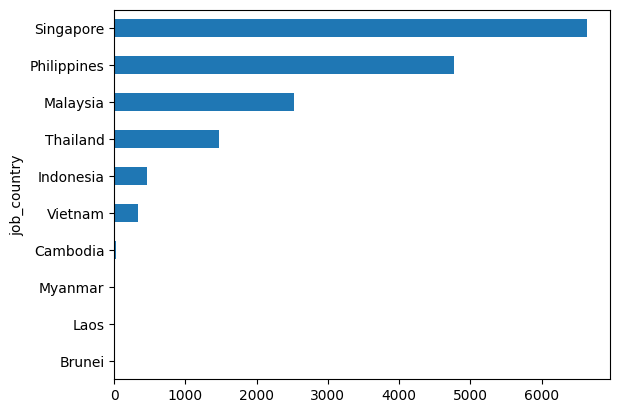

In [9]:
df_DA_SEA = df[
    (df['job_title_short'] == "Data Analyst") &
    (df['job_country'].isin(SEA_countries))
    ].copy()

df_DA_SEA_demand = df_DA_SEA['job_country'].value_counts()

df_DA_SEA_demand.plot(kind='bar')

plt.gca().invert_yaxis()


<Axes: ylabel='job_country'>

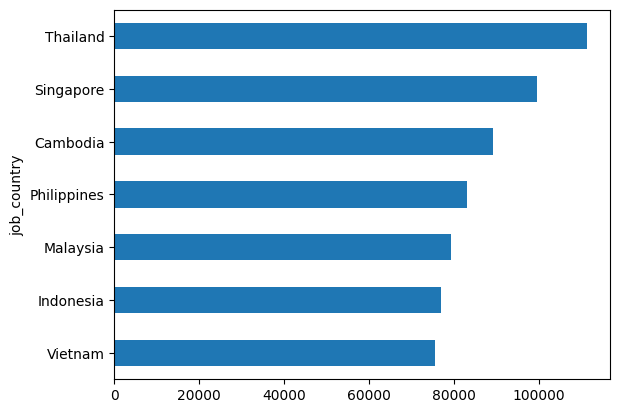

In [15]:
df_DA_SEA2 = df_DA_SEA.dropna(subset='salary_year_avg')
df_DA_SEA_pay = df_DA_SEA2.groupby('job_country')['salary_year_avg'].median().sort_values(ascending=True)

df_DA_SEA_pay.plot(kind='barh')
